In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pl
import math

/usr/lib64/python2.7/site-packages/pandas/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from pandas import hashtable, tslib, lib
/usr/lib64/python2.7/site-packages/pandas/core/common.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  import pandas.algos as algos
/usr/lib64/python2.7/site-packages/pandas/core/index.py:12: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  import pandas.index as _index
/usr/lib64/python2.7/site-packages/pandas/tseries/frequencies.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  import pandas._period as period
/usr/lib64/python2.7/site-packages/pandas/sparse/array.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from pandas._sparse import BlockIndex, IntIndex
/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:28: RuntimeWarning: numpy.dtype size changed, may indic

To start, with my initial detector set up (which can be seen as a screenshot in a folder clearly labelled), I ran a 300MeV, 600MeV, 3GeV and 300GeV proton beams. Each run had 2000 events. As expected, as the energy increased, the resolution decreased with what looks like an exponential rate. This can be seen in the resolution graphs below.

The following 4 code boxes are basically copy and paste jobs, but they import the information from the right file, rename the columns, drop columns where I messed up the nutple saving data and then calculate E_cal and E_energy.

In [2]:
# 300MeV protons fired 2000 times
inputData = pd.read_csv( "./300MeV/output_nt_Energy.csv", comment="#", header=None)
inputData.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
inputData=inputData.drop([1, 2], axis=1)
inputData["E_cal_total"]=(inputData["True"]/(inputData["Layer1"]+inputData["Layer2"]+inputData["Layer3"]+inputData["Layer4"]+inputData["Layer5"]))
inputData = inputData.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = inputData["E_cal_total"].mean()
inputData["E_energy"]=((((inputData["Layer1"]+inputData["Layer2"]+inputData["Layer3"]+inputData["Layer4"]+inputData["Layer5"])*E_cal)-inputData["True"])/inputData["True"])

In [3]:
# 3GeV protons fired 2000 times.
Data3G = pd.read_csv( "./3GeV/output_nt_Energy.csv", comment="#", header=None)
Data3G.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
Data3G=Data3G.drop([1, 2], axis=1)
Data3G["E_cal_total"]=(Data3G["True"]/(Data3G["Layer1"]+Data3G["Layer2"]+Data3G["Layer3"]+Data3G["Layer4"]+Data3G["Layer5"]))
Data3G = Data3G.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = Data3G["E_cal_total"].mean()
Data3G["E_energy"]=((((Data3G["Layer1"]+Data3G["Layer2"]+Data3G["Layer3"]+Data3G["Layer4"]+Data3G["Layer5"])*E_cal)-Data3G["True"])/Data3G["True"])

In [4]:
# 600MeV protons fired 2000 times.
Data600M = pd.read_csv( "./600MeV/output_nt_Energy.csv", comment="#", header=None)
Data600M.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
Data600M=Data600M.drop([1, 2], axis=1)
Data600M["E_cal_total"]=(Data600M["True"]/(Data600M["Layer1"]+Data600M["Layer2"]+Data600M["Layer3"]+Data600M["Layer4"]+Data600M["Layer5"]))
Data600M = Data600M.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = Data600M["E_cal_total"].mean()
Data600M["E_energy"]=((((Data600M["Layer1"]+Data600M["Layer2"]+Data600M["Layer3"]+Data600M["Layer4"]+Data600M["Layer5"])*E_cal)-Data600M["True"])/Data600M["True"])

In [5]:
# 300GeV protons fired 2000 times.
BigData = pd.read_csv( "./300GeV/output_nt_Energy.csv", comment="#", header=None)
BigData.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
BigData=BigData.drop([1, 2], axis=1)
BigData["E_cal_total"]=(BigData["True"]/(BigData["Layer1"]+BigData["Layer2"]+BigData["Layer3"]+BigData["Layer4"]+BigData["Layer5"]))
BigData = BigData.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = BigData["E_cal_total"].mean()
BigData["E_energy"]=((((BigData["Layer1"]+BigData["Layer2"]+BigData["Layer3"]+BigData["Layer4"]+BigData["Layer5"])*E_cal)-BigData["True"])/BigData["True"])

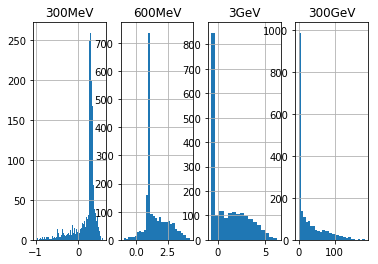

In [6]:
plt.subplot(141)
plt.gca().set_title('300MeV')
inputData["E_energy"].hist(bins='auto')
plt.subplot(142)
plt.gca().set_title('600MeV')
Data600M["E_energy"].hist(bins='auto')
plt.subplot(143)
plt.gca().set_title('3GeV')
Data3G["E_energy"].hist(bins='auto')
plt.subplot(144)
plt.gca().set_title('300GeV')
BigData["E_energy"].hist(bins='auto')
plt.show()

In [7]:
inputData["E_energy"].std(),Data600M["E_energy"].std(),Data3G["E_energy"].std(),BigData["E_energy"].std(),

(0.24822787335199506,
 0.9102312362562782,
 1.7446097399031457,
 36.65243319988855)

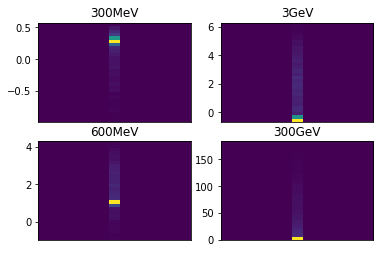

In [8]:
plt.subplot(221)
plt.gca().set_title('300MeV')
pl.hist2d( inputData["True"], inputData["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(222)
plt.gca().set_title('3GeV')
pl.hist2d( Data3G["True"], Data3G["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(223)
plt.gca().set_title('600MeV')
pl.hist2d( Data600M["True"], Data600M["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(224)
plt.gca().set_title('300GeV')
pl.hist2d( BigData["True"], BigData["E_energy"], bins=(15,30) )
plt.xticks([])
plt.show()

I decided to experiment with different particles to see if I could see a difference in resolutions (...as I should). I used neutrons, mu+ and mu- next for a mix of charged/uncharged particles and a range of masses.

In [9]:
# 300MeV neutrons fired 2000 times
Neutron300M = pd.read_csv( "./300MeV_neutron/output_nt_Energy.csv", comment="#", header=None)
Neutron300M.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
Neutron300M=Neutron300M.drop([1, 2], axis=1)
Neutron300M["E_cal_total"]=(Neutron300M["True"]/(Neutron300M["Layer1"]+Neutron300M["Layer2"]+Neutron300M["Layer3"]+Neutron300M["Layer4"]+Neutron300M["Layer5"]))
Neutron300M = Neutron300M.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = Neutron300M["E_cal_total"].mean()
Neutron300M["E_energy"]=((((Neutron300M["Layer1"]+Neutron300M["Layer2"]+Neutron300M["Layer3"]+Neutron300M["Layer4"]+Neutron300M["Layer5"])*E_cal)-Neutron300M["True"])/Neutron300M["True"])

In [10]:
# Mu+ 300MeV fired 2000 times
MuPlus300M = pd.read_csv( "./300MeV_mu+/output_nt_Energy.csv", comment="#", header=None)
MuPlus300M.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
MuPlus300M=MuPlus300M.drop([1, 2], axis=1)
MuPlus300M["E_cal_total"]=(MuPlus300M["True"]/(MuPlus300M["Layer1"]+MuPlus300M["Layer2"]+MuPlus300M["Layer3"]+MuPlus300M["Layer4"]+MuPlus300M["Layer5"]))
MuPlus300M = MuPlus300M.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = MuPlus300M["E_cal_total"].mean()
MuPlus300M["E_energy"]=((((MuPlus300M["Layer1"]+MuPlus300M["Layer2"]+MuPlus300M["Layer3"]+MuPlus300M["Layer4"]+MuPlus300M["Layer5"])*E_cal)-MuPlus300M["True"])/MuPlus300M["True"])

In [11]:
# Mu- 300MeV fired 2000 times
MuMinus300M = pd.read_csv( "./300MeV_mu-/output_nt_Energy.csv", comment="#", header=None)
MuMinus300M.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
MuMinus300M=MuMinus300M.drop([1, 2], axis=1)
MuMinus300M["E_cal_total"]=(MuMinus300M["True"]/(MuMinus300M["Layer1"]+MuMinus300M["Layer2"]+MuMinus300M["Layer3"]+MuMinus300M["Layer4"]+MuMinus300M["Layer5"]))
MuMinus300M = MuMinus300M.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = MuMinus300M["E_cal_total"].mean()
MuMinus300M["E_energy"]=((((MuMinus300M["Layer1"]+MuMinus300M["Layer2"]+MuMinus300M["Layer3"]+MuMinus300M["Layer4"]+MuMinus300M["Layer5"])*E_cal)-MuMinus300M["True"])/MuMinus300M["True"])

All the particles were 300MeV fired 2000 times. Below you can clearly see the muons have the narrowest resolution whilst the neutron has the widest. The proton is strange as its resolution isn't centred on 0. Possibly because I used brass instead of something like lead?

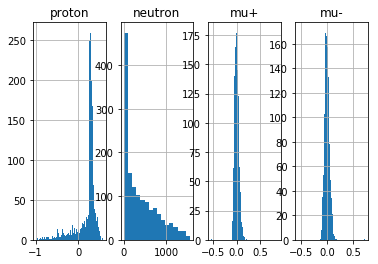

In [12]:
plt.subplot(141)
plt.gca().set_title('proton')
inputData["E_energy"].hist(bins='auto')
plt.subplot(142)
plt.gca().set_title('neutron')
Neutron300M["E_energy"].hist(bins='auto')
plt.subplot(143)
plt.gca().set_title('mu+')
MuPlus300M["E_energy"].hist(bins='auto')
plt.subplot(144)
plt.gca().set_title('mu-')
MuMinus300M["E_energy"].hist(bins='auto')
plt.show()

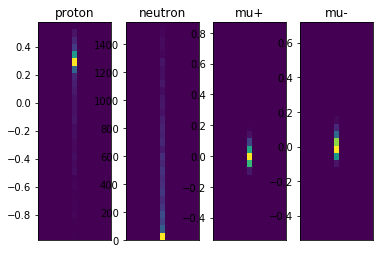

In [13]:
plt.subplot(141)
plt.gca().set_title('proton')
pl.hist2d( inputData["True"], inputData["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(142)
plt.gca().set_title('neutron')
pl.hist2d( Neutron300M["True"], Neutron300M["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(143)
plt.gca().set_title('mu+')
pl.hist2d( MuPlus300M["True"], MuPlus300M["E_energy"], bins=(15,30) )
plt.xticks([])
plt.subplot(144)
plt.gca().set_title('mu-')
pl.hist2d( MuMinus300M["True"], MuMinus300M["E_energy"], bins=(15,30) )
plt.xticks([])
plt.show()

Next I decided to implement the incremental increases to energy to see how that effect the resolution for both protons and mu+. I chose two positive particles as I had a magnetic field applied and wanted to see if it was just the proton that gave strange results or whether it was all(?) positive particles in my experiment.

In [14]:
# 300MeV protons increased by 100MeV each run for 2000 runs
IncrData = pd.read_csv( "./StepUpMeV/output_nt_Energy.csv", comment="#", header=None)
IncrData.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
IncrData=IncrData.drop([1, 2], axis=1)
IncrData["E_cal_total"]=(IncrData["True"]/(IncrData["Layer1"]+IncrData["Layer2"]+IncrData["Layer3"]+IncrData["Layer4"]+IncrData["Layer5"]))
IncrData = IncrData.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = IncrData["E_cal_total"].mean()
IncrData["E_energy"]=((((IncrData["Layer1"]+IncrData["Layer2"]+IncrData["Layer3"]+IncrData["Layer4"]+IncrData["Layer5"])*E_cal_ramped)-IncrData["True"])/IncrData["True"])

In [15]:
# 300MeV Mu+ increased by 100MeV each run for 2000 runs
IncrDataMu = pd.read_csv( "./RampingMu+/output_nt_Energy.csv", comment="#", header=None)
IncrDataMu.rename(columns={0: 'True', 3: 'Layer1',4: 'Layer2',5: 'Layer3',6: 'Layer4',7: 'Layer5'}, inplace=True)
IncrDataMu=IncrDataMu.drop([1, 2], axis=1)
IncrDataMu["E_cal_total"]=(IncrDataMu["True"]/(IncrDataMu["Layer1"]+IncrDataMu["Layer2"]+IncrDataMu["Layer3"]+IncrDataMu["Layer4"]+IncrDataMu["Layer5"]))
IncrDataMu = IncrDataMu.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = IncrDataMu["E_cal_total"].mean()
IncrDataMu["E_energy"]=((((IncrDataMu["Layer1"]+IncrDataMu["Layer2"]+IncrDataMu["Layer3"]+IncrDataMu["Layer4"]+IncrDataMu["Layer5"])*E_cal_ramped)-IncrDataMu["True"])/IncrDataMu["True"])

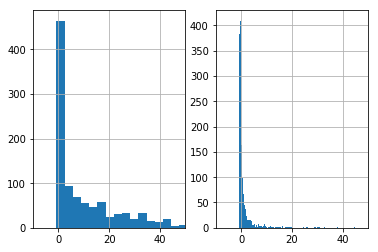

In [16]:
plt.subplot(121)
plt.xlim(-10,50)
IncrData["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.xlim(-10,50)
IncrDataMu["E_energy"].hist(bins='auto')
plt.show()

In [17]:
IncrData["E_energy"].std(),IncrDataMu["E_energy"].std()

(14.59154351624159, 9.88358774708678)

Unsurprisingly, my data isn't even gaussian BUT is centred on 0. Which I guess shows it's working but there's some sort of systematic error somewhere that messes with negative values.

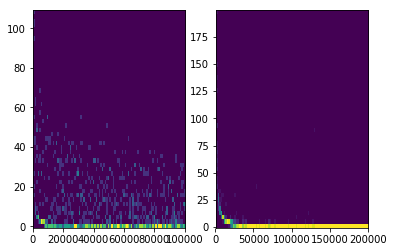

In [18]:
plt.subplot(121)
pl.hist2d( IncrData["True"], IncrData["E_energy"], bins=(100,50) )
plt.subplot(122)
pl.hist2d( IncrDataMu["True"], IncrDataMu["E_energy"], bins=(100,50) )
plt.show()

A little more surprising is that the two particles show the same trend in resolution over the same range, but the mu+ is much more often correctly accounted for.

So to check the experiment, I attempted to use the truth data next (I went back to constant energy particles), similar to the checkpoint (I didn't do very well, I tried to merge dataframes cos I thought I could beat the system ..I didn't) but given the results, I'm still not sure I did it right

In [19]:
truthData = pd.read_csv( "./300MeVTruth/output_nt_Tracker1.csv", comment="#",
names=[ "EventID", "Phi", "Theta", "Energy" ] )
tracker1Data = pd.read_csv( "./300MeVTruth/output_nt_Tracker1.csv", comment="#",
names=[ "EventID", "tracker1Phi", "tracker1Theta" ] )
tracker2Data = pd.read_csv( "./300MeVTruth/output_nt_Tracker2.csv", comment="#",
names=[ "EventID", "tracker2Phi", "tracker2Theta" ] )

In [20]:
m = truthData.groupby("EventID").count()
m.Phi.head()

EventID
0     1
1     1
2     1
3     1
4    29
Name: Phi, dtype: int64

In [21]:
truthData["tracker1Phi"]=tracker1Data["tracker1Phi"]
truthData["tracker2Phi"]=tracker2Data["tracker2Phi"]
truthData["tracker1Theta"]=tracker1Data["tracker1Theta"]
truthData["deltaPhi"]=np.abs(truthData["tracker1Phi"] - truthData["tracker2Phi"])

truthData = truthData.where(truthData["deltaPhi"] < 0.001)

truthData["sagitta"] = np.sin(truthData["deltaPhi"])

truthData["R"]= (0.4**2.0) / (8.0*truthData["sagitta"])

truthData["p_T"]=0.3*0.1*truthData["R"]

truthData["p"]=truthData["p_T"] / np.sin(truthData["tracker1Theta"])

truthData["dist"]=(truthData["p"]-300)/300

truthData=truthData.drop(["Energy"], axis=1)

truthData = truthData.replace([np.inf, -np.inf], np.nan).dropna()

In [22]:
truthData.head()

,EventID,Phi,Theta,tracker1Phi,tracker2Phi,tracker1Theta,deltaPhi,sagitta,R,p_T,p,dist
5,4,-0.000011,1.56666,-0.000011,-0.000590,1.56666,0.000579,0.000579,34.567391,1.037022,1.037031,-0.996543
6,4,0.000132,1.56680,0.000132,-0.000594,1.56680,0.000725,0.000725,27.572176,0.827165,0.827172,-0.997243
39,11,0.000000,1.56666,0.000000,-0.000816,1.56666,0.000816,0.000816,24.497318,0.734920,0.734926,-0.997550
40,12,0.000000,1.56666,0.000000,-0.000512,1.56666,0.000512,0.000512,39.092432,1.172773,1.172783,-0.996091
41,13,0.000000,1.56666,0.000000,-0.000364,1.56666,0.000364,0.000364,54.995217,1.649856,1.649871,-0.994500


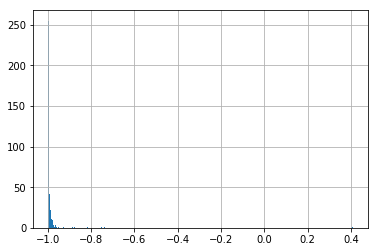

In [23]:
truthData["dist"].hist(bins='auto')

Although obviously not centred on 0. This process I followed was from the checkpoint and based on the fact that the magnetic field was in the z-direction. In my experiment, my magnetic field was in the y-direction. I am hoping that this is the reason my distribution isn't centred on 0 but -1.0.

# IMPROVEMENTS

So now having made the experiment and tested multiple different particles, it's now time to try and attempt to improve the resolution. In the following, I try adding more layers to the existing template before changing the shape of the detectors (seen as screenshots in the folder labelled) and then adding more layers of detectors and different material detectors.

The following is me adding more layers of detectors (from 5 -> 10)

In [24]:
muminuslayers = pd.read_csv( "./300MeV_mu-_moredetectorlayers/output_nt_Energy.csv", comment="#", header=None)
muminuslayers.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
muminuslayers["E_cal_total"]=(muminuslayers["True"]/(muminuslayers["Layer1"]+muminuslayers["Layer2"]+muminuslayers["Layer3"]+muminuslayers["Layer4"]+muminuslayers["Layer5"]+muminuslayers["Layer6"]+muminuslayers["Layer7"]+muminuslayers["Layer8"]+muminuslayers["Layer9"]+muminuslayers["Layer10"]))
E_cal_ramped = muminuslayers["E_cal_total"].mean()
muminuslayers["E_energy"]=((((muminuslayers["Layer1"]+muminuslayers["Layer2"]+muminuslayers["Layer3"]+muminuslayers["Layer4"]+muminuslayers["Layer5"]+muminuslayers["Layer6"]+muminuslayers["Layer7"]+muminuslayers["Layer8"]+muminuslayers["Layer9"]+muminuslayers["Layer10"])*E_cal_ramped)-muminuslayers["True"])/muminuslayers["True"])

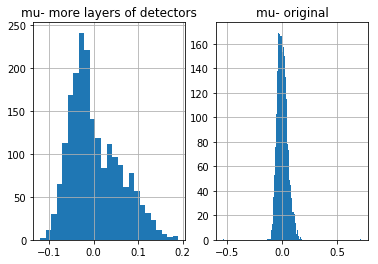

In [25]:
plt.subplot(121)
plt.gca().set_title('mu- more layers of detectors')
muminuslayers["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('mu- original')
MuMinus300M["E_energy"].hist(bins='auto')

In [26]:
muminuslayers["E_energy"].std(), MuMinus300M["E_energy"].std()

(0.056451088248459645, 0.0507074856720685)

So we can clearly see that the resolution for the original is better than the resolution of adding more layers. This isn't what I expected as I figured that the more layers there were for energy to be deposited, the more accurate the calculation of E would be and hence a narrower resolution.

However, maybe because I used brass instead of a proper HEP material, more layers caused more interactions/particle production than before.

So instead of adding layers, I decided to try to change the shape of the detectors to catch more rapidity in the experiment. I went from a disk shaped detector to half a hollow sphere. which can be seen in the screenshots.

In [27]:
MuMinusShape300M = pd.read_csv( "./300MeV_mu-_newdetectorshape/output_nt_Energy.csv", comment="#", header=None)
MuMinusShape300M.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
MuMinusShape300M["E_cal_total"]=(MuMinusShape300M["True"]/(MuMinusShape300M["Layer1"]+MuMinusShape300M["Layer2"]+MuMinusShape300M["Layer3"]+MuMinusShape300M["Layer4"]+MuMinusShape300M["Layer5"]))
MuMinusShape300M = MuMinusShape300M.replace([np.inf, -np.inf], np.nan).dropna()
E_cal = MuMinusShape300M["E_cal_total"].mean()
MuMinusShape300M["E_energy"]=((((MuMinusShape300M["Layer1"]+MuMinusShape300M["Layer2"]+MuMinusShape300M["Layer3"]+MuMinusShape300M["Layer4"]+MuMinusShape300M["Layer5"])*E_cal)-MuMinusShape300M["True"])/MuMinusShape300M["True"])

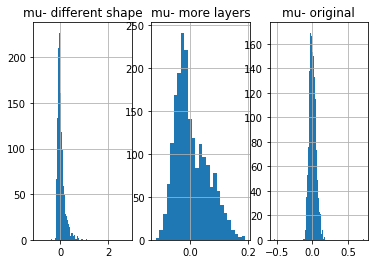

In [28]:
plt.subplot(131)
plt.gca().set_title('mu- different shape')
MuMinusShape300M["E_energy"].hist(bins='auto')
plt.subplot(132)
plt.gca().set_title('mu- more layers')
muminuslayers["E_energy"].hist(bins='auto')
plt.subplot(133)
plt.gca().set_title('mu- original')
MuMinus300M["E_energy"].hist(bins='auto')

In [29]:
MuMinusShape300M["E_energy"].std(), muminuslayers["E_energy"].std(), MuMinus300M["E_energy"].std()

(0.16810382428236212, 0.056451088248459645, 0.0507074856720685)

The new spherical detectors seem to be EVEN WORSE at detecting than their disk shaped counterparts. They are made of the same material so I can only assumed that the geometry is affecting the resolution here.

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

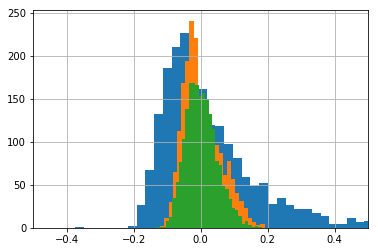

In [30]:
plt.xlim(-0.5,0.5)
plt.subplot(111)
MuMinusShape300M["E_energy"].hist(bins='auto')
plt.subplot(111)
muminuslayers["E_energy"].hist(bins='auto')
plt.subplot(111)
MuMinus300M["E_energy"].hist(bins='auto')
plt.plot()

GREEN = NORMAL MU- //
ORANGE = MU- MORE LAYERS (10) ORIGINAL LAYOUT //
BLUE = MU- NEW SHAPE (5 LAYERS)

It's clear when you plot the data on top of each other than the resolutions are worse, but what's more clear is that the main difference between the number of layers and shape isn't much. The trend is similar, the only difference is the tails of the blue data is much more spread out which is the main reason for the decreased resolution.

Just to check how bad my new geometry actually was, I decided to again implement the incremental particle energy. I used multiple particles for comparison, Mu-, Mu+, Neutrons and photons.

In [31]:
RampMuMin = pd.read_csv( "./Ramping_mu-_new set up/output_nt_Energy.csv", comment="#", header=None)
RampMuMin.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
RampMuMin["E_cal_total"]=(RampMuMin["True"]/(RampMuMin["Layer1"]+RampMuMin["Layer2"]+RampMuMin["Layer3"]+RampMuMin["Layer4"]+RampMuMin["Layer5"]+RampMuMin["Layer6"]+RampMuMin["Layer7"]+RampMuMin["Layer8"]+RampMuMin["Layer9"]+RampMuMin["Layer10"]))
E_cal_ramped = RampMuMin["E_cal_total"].mean()
RampMuMin["E_energy"]=((((RampMuMin["Layer1"]+RampMuMin["Layer2"]+RampMuMin["Layer3"]+RampMuMin["Layer4"]+RampMuMin["Layer5"]+RampMuMin["Layer6"]+RampMuMin["Layer7"]+RampMuMin["Layer8"]+RampMuMin["Layer9"]+RampMuMin["Layer10"])*E_cal_ramped)-RampMuMin["True"])/RampMuMin["True"])

In [32]:
RampMuPlu = pd.read_csv( "./Ramping_mu+_new set up/output_nt_Energy.csv", comment="#", header=None)
RampMuPlu.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
RampMuPlu["E_cal_total"]=(RampMuPlu["True"]/(RampMuPlu["Layer1"]+RampMuPlu["Layer2"]+RampMuPlu["Layer3"]+RampMuPlu["Layer4"]+RampMuPlu["Layer5"]+RampMuPlu["Layer6"]+RampMuPlu["Layer7"]+RampMuPlu["Layer8"]+RampMuPlu["Layer9"]+RampMuPlu["Layer10"]))
E_cal_ramped = RampMuPlu["E_cal_total"].mean()
RampMuPlu["E_energy"]=((((RampMuPlu["Layer1"]+RampMuPlu["Layer2"]+RampMuPlu["Layer3"]+RampMuPlu["Layer4"]+RampMuPlu["Layer5"]+RampMuPlu["Layer6"]+RampMuPlu["Layer7"]+RampMuPlu["Layer8"]+RampMuPlu["Layer9"]+RampMuPlu["Layer10"])*E_cal_ramped)-RampMuPlu["True"])/RampMuPlu["True"])

In [33]:
RampNeu = pd.read_csv( "./Ramping_neutron_new set up/output_nt_Energy.csv", comment="#", header=None)
RampNeu.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
RampNeu["E_cal_total"]=(RampNeu["True"]/(RampNeu["Layer1"]+RampNeu["Layer2"]+RampNeu["Layer3"]+RampNeu["Layer4"]+RampNeu["Layer5"]+RampNeu["Layer6"]+RampNeu["Layer7"]+RampNeu["Layer8"]+RampNeu["Layer9"]+RampNeu["Layer10"]))
RampNeu = RampNeu.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = RampNeu["E_cal_total"].mean()
RampNeu["E_energy"]=((((RampNeu["Layer1"]+RampNeu["Layer2"]+RampNeu["Layer3"]+RampNeu["Layer4"]+RampNeu["Layer5"]+RampNeu["Layer6"]+RampNeu["Layer7"]+RampNeu["Layer8"]+RampNeu["Layer9"]+RampNeu["Layer10"])*E_cal_ramped)-RampNeu["True"])/RampNeu["True"])

In [34]:
RampPho = pd.read_csv( "./Ramping_photon_new set up/output_nt_Energy.csv", comment="#", header=None)
RampPho.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
RampPho["E_cal_total"]=(RampPho["True"]/(RampPho["Layer1"]+RampPho["Layer2"]+RampPho["Layer3"]+RampPho["Layer4"]+RampPho["Layer5"]+RampPho["Layer6"]+RampPho["Layer7"]+RampPho["Layer8"]+RampPho["Layer9"]+RampPho["Layer10"]))
RampPho = RampPho.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = RampPho["E_cal_total"].mean()
RampPho["E_energy"]=((((RampPho["Layer1"]+RampPho["Layer2"]+RampPho["Layer3"]+RampPho["Layer4"]+RampPho["Layer5"]+RampPho["Layer6"]+RampPho["Layer7"]+RampPho["Layer8"]+RampPho["Layer9"]+RampPho["Layer10"])*E_cal_ramped)-RampPho["True"])/RampPho["True"])

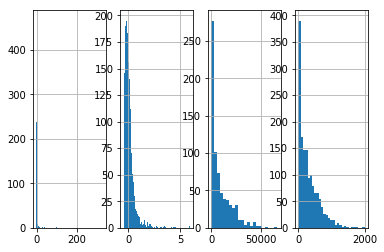

In [35]:
plt.subplot(141)
RampMuMin["E_energy"].hist(bins='auto')
plt.subplot(142)
RampMuPlu["E_energy"].hist(bins='auto')
plt.subplot(143)
RampNeu["E_energy"].hist(bins='auto')
plt.subplot(144)
RampPho["E_energy"].hist(bins='auto')
plt.show()

In [36]:
RampMuMin["E_energy"].std(), RampMuPlu["E_energy"].std(), RampNeu["E_energy"].std(),RampPho["E_energy"].std()

(12.705195627316632,
 0.5531537353302125,
 10974.765630767939,
 301.71390909964407)

The resolution for Neutrons and Photons was absolutely shocking. But the results for my muons was more strange. The mu- resolution was terrible but the resolution for the m+ was the best of the bunch. I'm assuming it has something to do with the magnetic field and way the experiment was located in the world.

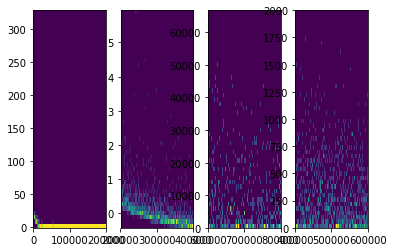

In [37]:
plt.subplot(141)
pl.hist2d( RampMuMin["True"], RampMuMin["E_energy"], bins=(100,50) )
plt.subplot(142)
pl.hist2d( RampMuPlu["True"], RampMuPlu["E_energy"], bins=(100,50) )
plt.subplot(143)
pl.hist2d( RampNeu["True"], RampNeu["E_energy"], bins=(100,50) )
plt.subplot(144)
pl.hist2d( RampPho["True"], RampPho["E_energy"], bins=(100,50) )
plt.show()

Next I added more layers to my new shape, I'm just messing around with it now, and lo and behold, my resolution becomes so much better

In [38]:
ShapeLayers = pd.read_csv( "./300MeV_mu-_newdetectorshapeandlayers/output_nt_Energy.csv", comment="#", header=None)
ShapeLayers.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5',6: 'Layer6',7: 'Layer7',8: 'Layer8',9: 'Layer9',10: 'Layer10'}, inplace=True)
ShapeLayers["E_cal_total"]=(ShapeLayers["True"]/(ShapeLayers["Layer1"]+ShapeLayers["Layer2"]+ShapeLayers["Layer3"]+ShapeLayers["Layer4"]+ShapeLayers["Layer5"]+ShapeLayers["Layer6"]+ShapeLayers["Layer7"]+ShapeLayers["Layer8"]+ShapeLayers["Layer9"]+ShapeLayers["Layer10"]))
ShapeLayers = ShapeLayers.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = ShapeLayers["E_cal_total"].mean()
ShapeLayers["E_energy"]=((((ShapeLayers["Layer1"]+ShapeLayers["Layer2"]+ShapeLayers["Layer3"]+ShapeLayers["Layer4"]+ShapeLayers["Layer5"]+ShapeLayers["Layer6"]+ShapeLayers["Layer7"]+ShapeLayers["Layer8"]+ShapeLayers["Layer9"]+ShapeLayers["Layer10"])*E_cal_ramped)-ShapeLayers["True"])/ShapeLayers["True"])

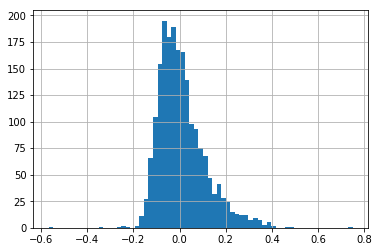

In [39]:
ShapeLayers["E_energy"].hist(bins='auto')

In [40]:
ShapeLayers["E_energy"].std(),MuMinus300M["E_energy"].std()

(0.10422218811959, 0.0507074856720685)

Still not great but better than before.

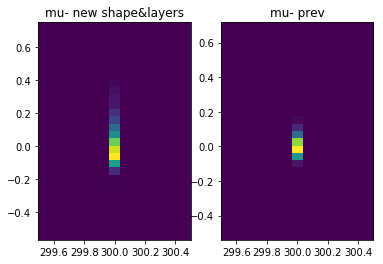

In [41]:
plt.subplot(121)
plt.gca().set_title('mu- new shape&layers')
pl.hist2d( ShapeLayers["True"], ShapeLayers["E_energy"], bins=(15,30) )
plt.subplot(122)
plt.gca().set_title('mu- prev')
pl.hist2d( MuMinus300M["True"], MuMinus300M["E_energy"], bins=(15,30) )
plt.show()

Now I decide to switch from Brass to silicon for my absorbers. Suprisingly, the resolution decreased compared to Brass. Higher density wins here

In [42]:
#New spherical shape made of silicon instead of brass
ShapeMat = pd.read_csv( "./300MeV_mu-_newdetectorshapeandmaterial/output_nt_Energy.csv", comment="#", header=None)
ShapeMat.rename(columns={0: 'True',1 : 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
ShapeMat["E_cal_total"]=(ShapeMat["True"]/(ShapeMat["Layer1"]+ShapeMat["Layer2"]+ShapeMat["Layer3"]+ShapeMat["Layer4"]+ShapeMat["Layer5"]))
ShapeMat = ShapeMat.replace([np.inf, -np.inf], np.nan).dropna()
E_cal_ramped = ShapeMat["E_cal_total"].mean()
ShapeMat["E_energy"]=((((ShapeMat["Layer1"]+ShapeMat["Layer2"]+ShapeMat["Layer3"]+ShapeMat["Layer4"]+ShapeMat["Layer5"])*E_cal_ramped)-ShapeMat["True"])/ShapeMat["True"])

[]

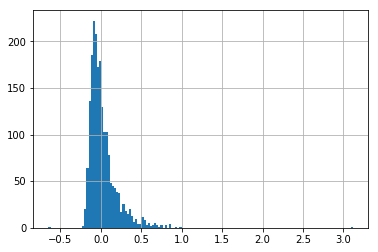

In [43]:
ShapeMat["E_energy"].hist(bins='auto')
plt.plot()

In [44]:
ShapeMat["E_energy"].std()

0.18083783271545487

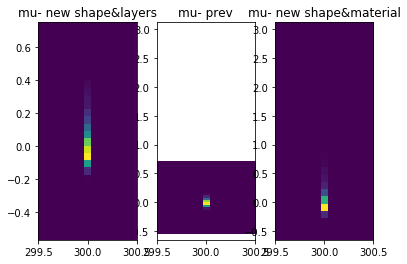

In [45]:
ax2 = plt.subplot(132)
plt.subplot(132)
plt.gca().set_title('mu- prev')
pl.hist2d( MuMinus300M["True"], MuMinus300M["E_energy"], bins=(15,30) )
ax1 = plt.subplot(131,sharey=ax2)
plt.subplot(131)
plt.gca().set_title('mu- new shape&layers')
pl.hist2d( ShapeLayers["True"], ShapeLayers["E_energy"], bins=(15,30) )
ax3 = plt.subplot(133)
plt.subplot(133 ,sharey=ax2)
plt.gca().set_title('mu- new shape&material')
pl.hist2d( ShapeMat["True"], ShapeMat["E_energy"], bins=(15,30) )
plt.show()

# DID improvements actually get better??

I decided to use the NN we've been using, and train it on the data gathered for generic mu-, mu- fired through more layers, mu- fired through the new shape etc to see if the resolution of the NN would be decent considering the small data size that it would have to work with, I left the learning rates and epochs all the same so I could make a meaningful comparison.


In [46]:
# Generated Mu- by the NN from basic 2000x 300MeV Mu- from the original detector set up
GenMuMinus300M = pd.read_csv( "./300MeV_mu-/generatedData.csv", comment="#", header=None)
GenMuMinus300M.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
GenMuMinus300M["E_cal_total"]=(GenMuMinus300M["True"]/(GenMuMinus300M["Layer1"]+GenMuMinus300M["Layer2"]+GenMuMinus300M["Layer3"]+GenMuMinus300M["Layer4"]+GenMuMinus300M["Layer5"]))
E_cal = GenMuMinus300M["E_cal_total"].mean()
GenMuMinus300M["E_energy"]=((((GenMuMinus300M["Layer1"]+GenMuMinus300M["Layer2"]+GenMuMinus300M["Layer3"]+GenMuMinus300M["Layer4"]+GenMuMinus300M["Layer5"])*E_cal)-GenMuMinus300M["True"])/GenMuMinus300M["True"])

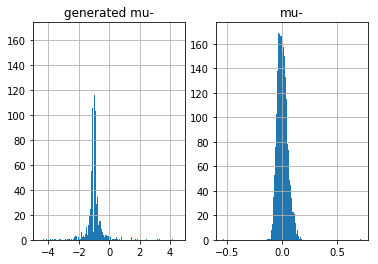

In [47]:
plt.subplot(121)
plt.xlim(-5,5)
plt.gca().set_title('generated mu-')
GenMuMinus300M["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('mu-')
MuMinus300M["E_energy"].hist(bins='auto')
plt.show()

In [48]:
GenMuMinus300M["E_energy"].std(),MuMinus300M["E_energy"].std()

(10.75831522017621, 0.0507074856720685)

As expected the resolution was nowhere near as good at the original mu- resolution.

So now I added more layers (5 -> 10)

In [49]:
genmuminuslayers300M = pd.read_csv( "./300MeV_mu-_moredetectorlayers/generatedData.csv", comment="#", header=None)
genmuminuslayers300M.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
genmuminuslayers300M["E_cal_total"]=(genmuminuslayers300M["True"]/(genmuminuslayers300M["Layer1"]+genmuminuslayers300M["Layer2"]+genmuminuslayers300M["Layer3"]+genmuminuslayers300M["Layer4"]+genmuminuslayers300M["Layer5"]))
E_cal = genmuminuslayers300M["E_cal_total"].mean()
genmuminuslayers300M["E_energy"]=((((genmuminuslayers300M["Layer1"]+genmuminuslayers300M["Layer2"]+genmuminuslayers300M["Layer3"]+genmuminuslayers300M["Layer4"]+genmuminuslayers300M["Layer5"])*E_cal)-genmuminuslayers300M["True"])/genmuminuslayers300M["True"])

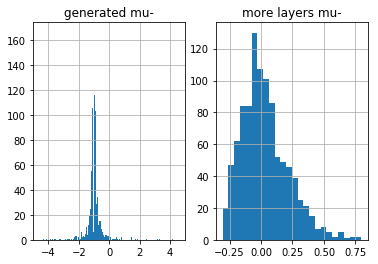

In [50]:
plt.subplot(121)
plt.xlim(-5,5)
plt.gca().set_title('generated mu-')
GenMuMinus300M["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('more layers mu-')
genmuminuslayers300M["E_energy"].hist(bins='auto')
plt.show()

In [51]:
GenMuMinus300M["E_energy"].std(),genmuminuslayers300M["E_energy"].std()

(10.75831522017621, 0.18609538912362972)

This is a huge improvement of almost 100x. Although I believe I have figured where I made the critical mistake that you will most likely notice when all the data is shown together at the end.

Now firing the Mu- through the new shaped detectors/absorbers.

In [52]:
genmuminusshape300M = pd.read_csv( "./300MeV_mu-_newdetectorshape/generatedData.csv", comment="#", header=None)
genmuminusshape300M.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
genmuminusshape300M["E_cal_total"]=(genmuminusshape300M["True"]/(genmuminusshape300M["Layer1"]+genmuminusshape300M["Layer2"]+genmuminusshape300M["Layer3"]+genmuminusshape300M["Layer4"]+genmuminusshape300M["Layer5"]))
E_cal = genmuminusshape300M["E_cal_total"].mean()
genmuminusshape300M["E_energy"]=((((genmuminusshape300M["Layer1"]+genmuminusshape300M["Layer2"]+genmuminusshape300M["Layer3"]+genmuminusshape300M["Layer4"]+genmuminusshape300M["Layer5"])*E_cal)-genmuminusshape300M["True"])/genmuminusshape300M["True"])

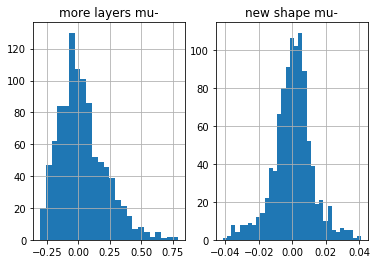

In [53]:
plt.subplot(121)
plt.gca().set_title('more layers mu-')
genmuminuslayers300M["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('new shape mu-')
genmuminusshape300M["E_energy"].hist(bins='auto')
plt.show()

In [54]:
genmuminuslayers300M["E_energy"].std(),genmuminusshape300M["E_energy"].std()

(0.18609538912362972, 0.011955698992034948)

Strangely, completely opposite to the real data, the generated data resolution is much more accurate. The best resolution I've managed to get yet.

So to improve, I add more layers of the new shape.

In [55]:
shapelayersnew = pd.read_csv( "./300MeV_mu-_newdetectorshapeandlayers/generatedData.csv", comment="#", header=None)
shapelayersnew.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
shapelayersnew["E_cal_total"]=(shapelayersnew["True"]/(shapelayersnew["Layer1"]+shapelayersnew["Layer2"]+shapelayersnew["Layer3"]+shapelayersnew["Layer4"]+shapelayersnew["Layer5"]))
E_cal = shapelayersnew["E_cal_total"].mean()
shapelayersnew["E_energy"]=((((shapelayersnew["Layer1"]+shapelayersnew["Layer2"]+shapelayersnew["Layer3"]+shapelayersnew["Layer4"]+shapelayersnew["Layer5"])*E_cal)-shapelayersnew["True"])/shapelayersnew["True"])

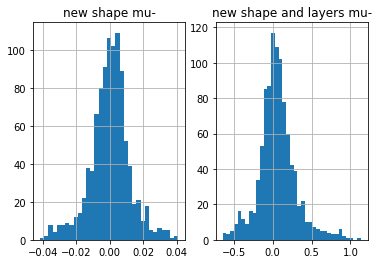

In [56]:
plt.subplot(121)
plt.gca().set_title('new shape mu-')
genmuminusshape300M["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('new shape and layers mu-')
shapelayersnew["E_energy"].hist(bins='auto')
plt.show()

In [57]:
genmuminusshape300M["E_energy"].std(),shapelayersnew["E_energy"].std()

(0.011955698992034948, 0.24109045742858112)

And now I end up back where I expected to be.

Maybe changing the material (Brass -> Silicon) will improve the resolution.

In [58]:
shapematnew = pd.read_csv( "./300MeV_mu-_newdetectorshapeandmaterial/generatedData.csv", comment="#", header=None)
shapematnew.rename(columns={0: 'True', 1: 'Layer1',2: 'Layer2',3: 'Layer3',4: 'Layer4',5: 'Layer5'}, inplace=True)
shapematnew["E_cal_total"]=(shapematnew["True"]/(shapematnew["Layer1"]+shapematnew["Layer2"]+shapematnew["Layer3"]+shapematnew["Layer4"]+shapematnew["Layer5"]))
E_cal = shapematnew["E_cal_total"].mean()
shapematnew["E_energy"]=((((shapematnew["Layer1"]+shapematnew["Layer2"]+shapematnew["Layer3"]+shapematnew["Layer4"]+shapematnew["Layer5"])*E_cal)-shapematnew["True"])/shapematnew["True"])

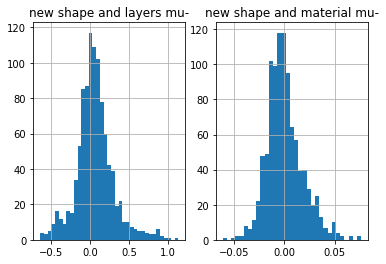

In [59]:
plt.subplot(121)
plt.gca().set_title('new shape and layers mu-')
shapelayersnew["E_energy"].hist(bins='auto')
plt.subplot(122)
plt.gca().set_title('new shape and material mu-')
shapematnew["E_energy"].hist(bins='auto')
plt.show()

In [60]:
shapelayersnew["E_energy"].std(), shapematnew["E_energy"].std()

(0.24109045742858112, 0.0178875813579413)

Now this was where I was really confused, BUT if you look through the final graphs you'll probably instantly see why.

[]

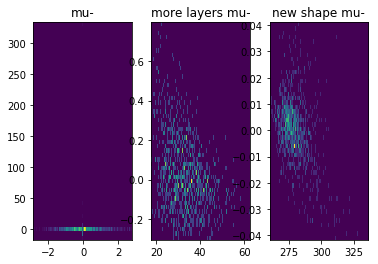

In [61]:
plt.subplot(131)
plt.gca().set_title('mu-')
pl.hist2d( GenMuMinus300M["True"], GenMuMinus300M["E_energy"], bins=(100,50) )
plt.subplot(132)
plt.gca().set_title('more layers mu-')
pl.hist2d( genmuminuslayers300M["True"], genmuminuslayers300M["E_energy"], bins=(100,50))
plt.subplot(133)
plt.gca().set_title('new shape mu-')
pl.hist2d( genmuminusshape300M["True"], genmuminusshape300M["E_energy"], bins=(100,50) )
plt.plot()

In [62]:
genmuminusshape300M["E_energy"].std(), MuMinus300M["E_energy"].std()

(0.011955698992034948, 0.0507074856720685)

[]

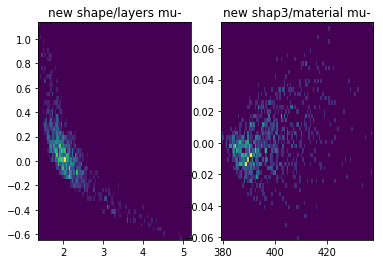

In [63]:
plt.subplot(121)
plt.gca().set_title('new shape/layers mu-')
pl.hist2d( shapelayersnew["True"], shapelayersnew["E_energy"], bins=(100,50) )
plt.subplot(122)
plt.gca().set_title('new shap3/material mu-')
pl.hist2d( shapematnew["True"], shapematnew["E_energy"], bins=(100,50) )
plt.plot()

I immediately noticed that the x-axis for the first two graphs were wrong. Completely wrong, I went back and checked the original data files that the NN was learning from. There were 2 columns full of 0's from where I had messed up my Ntuples. 

Previously (towards the top of the notebook) I was importing that data, dropping the columns and renaming them into better labels etc. However, I didn't take into account that the neural network wouldn't understand this and as such it has skewed my results. However, for the two resolutions that were really good, the original datafile it learns from didn't have the 0 columns issue from bad ntuples.

Sadly, the x-axis are different for most of the resolutions so I can't infer a trend. All I can safely say is that the shape of the new detector gives a great resolution compared to the disk shaped detectors (even when the seen in this particular section is N generated data having learnt from a very small subset.). Comparing the resolution for the GENERATED data vs REAL data. The generated data gives a better resolution. I think I can then safely assume that the new shape is better. Hence, an improvement.

# Conclusion

My data shows that my experiment gives better resolutions on particles with lower masses (muons vs protons/neutrons). Also from just looking at the tracking data files including, you can distinguish between a charged particle and non-charged particle via the angle they deviate from the x-axis (my magnetic field was in the y-axis). For example, the mu+ would bend in the field whilst the neutron would not.

It is also clearly shown that the hollow half-sphere is a better detector shape than a flat disk. Giving an almost 5x improvement in resolution between NN generated data and REAL data. I'm sure if the NN had better data to train on in other areas, it would be clear that more layers give a better resolution too as can be seen from my resolutions below. First is the new shape with more layers, second is just the new shape. The resolutions improves.

I can conclude, geometries that cover a larger area will improve resolution. More layers will also improve resolution.

Next time I would like to include more investigation into materials and resolution.

In [64]:
ShapeLayers["E_energy"].std(), MuMinusShape300M["E_energy"].std()

(0.10422218811959, 0.16810382428236212)